# Data Preprocessing

Data Preprocessing is the process of converting raw data into a well-readable format. It is the first and most crucial step in the data analysis process. It includes cleaning, normalization, transformation, and scaling of the data. In this notebook, we will perform the following steps for data preprocessing:
1. Importing Libraries
2. Loading the Data
3. Exploratory Data Analysis
4. Data Cleaning
5. Train-Test Split
6. Data Normalization
7. Data Transformation
8. Data Scaling
9. Feature Selection

In [1]:
import pandas as pd
import numpy as np
import joblib
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    LabelEncoder, 
    OrdinalEncoder,
    OneHotEncoder,
    MinMaxScaler,
    StandardScaler,
)

## Loading the Data

In [2]:
df = pd.read_csv('Exercise Chapter 2 Topic 4_ Data Kebotakan.csv')
df.head()

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
4,38.0,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,S2,1.0,0.368371


## Exploratory Data Analysis

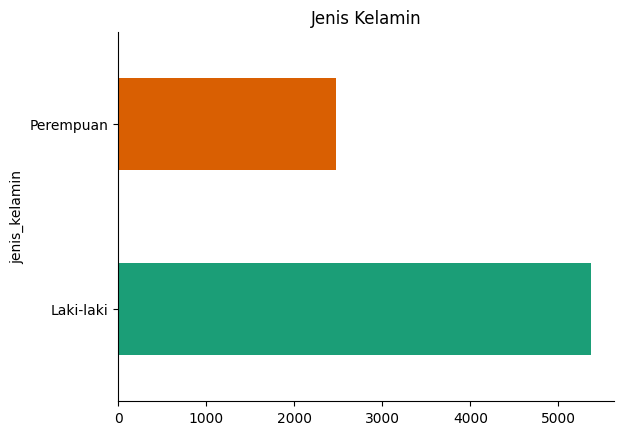

In [3]:
df.groupby('jenis_kelamin').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Jenis Kelamin')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

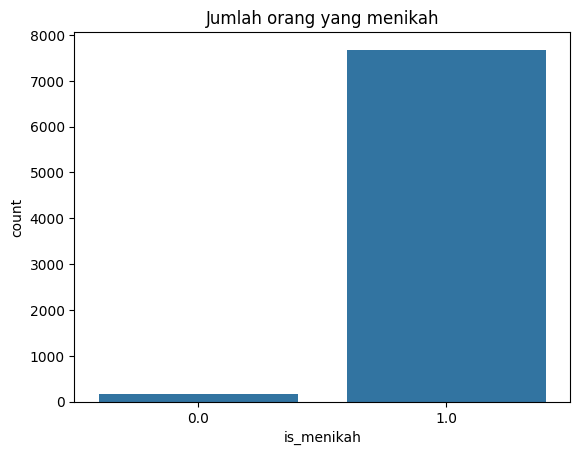

In [4]:
is_menikah = df['is_menikah'].value_counts()
# plt.bar(height=is_menikah.values, x=is_menikah.index)
sns.countplot(data=df, x='is_menikah')
plt.title("Jumlah orang yang menikah")
plt.show()

In [5]:
# Tampilkan jumlah data
print(f"Jumlah data: {len(df)} baris {len(df.columns)} kolom")

Jumlah data: 7917 baris 14 kolom


## Check Duplicated Data

In [6]:
df_unique = df.drop_duplicates()
print(f"Jumlah data setelah dihapus: {len(df_unique)} baris {len(df_unique.columns)} kolom")

Jumlah data setelah dihapus: 7835 baris 14 kolom


In [7]:
# Tampilkan missing value (jika ada)
df_unique.isnull().sum()

umur              85
jenis_kelamin     75
pekerjaan        154
provinsi          86
gaji              73
is_menikah        70
is_keturunan      88
berat             56
tinggi            74
sampo             59
is_merokok        69
pendidikan        69
stress            64
botak_prob        78
dtype: int64

In [8]:
# Kalo misal di hapus semua
print(f"Jumlah data: {len(df_unique.dropna())} baris {len(df_unique.columns)} kolom")

Jumlah data: 6811 baris 14 kolom


## Label Data Encoding
Pada data, kolom botak_prob merupakan kolom target yang akan diprediksi, saat ini kolom tersebut merupakan data probabilistik, sehingga perlu dilakukan encoding menjadi data kategorikal yaitu 1 dan 0.

In [9]:
df_unique =(
    df_unique
    .assign(
        botak=(df_unique['botak_prob'] > 0.5).astype(int)
    )
) 

df_unique.head()

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob,botak
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,S1,5.0,0.605974,1
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,S1,7.0,0.532860,1
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,S1,4.0,0.418442,0
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050,1
4,38.0,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,S2,1.0,0.368371,0


## Train Test Split
Membagi data menjadi data latih dan data uji

In [10]:
botak_train, botak_test = train_test_split(
    df_unique.drop(columns=['botak_prob']),
    test_size=0.2, 
    random_state=42
)
print(f"Jumlah data train: {len(botak_train)} baris")
print(f"Jumlah data test: {len(botak_test)} baris")

# Save to CSV
botak_train.to_csv('botak_train.csv', index=False)
botak_test.to_csv('botak_test.csv', index=False)

# Show the data
botak_train.head()

Jumlah data train: 6268 baris
Jumlah data test: 1567 baris


,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak
1737,52.0,Laki-laki,Pegawai swasta,Mamuju,8.764537e+06,1.0,0.0,59.385712,172.643958,Shoulder & Head,1.0,S3,7.0,1
3821,32.0,Laki-laki,Pegawai swasta,Kendari,6.437990e+06,1.0,0.0,71.451896,183.905206,Merpati,0.0,S1,1.0,0
1158,43.0,Laki-laki,NaN,Tanjung Pinang,1.165799e+07,1.0,0.0,43.200024,154.971106,Moonsilk,0.0,S1,5.0,1
4693,43.0,Perempuan,PNS,Palangkaraya,7.519659e+06,1.0,1.0,47.868319,175.886538,Moonsilk,1.0,S1,9.0,1
5169,43.0,Laki-laki,Freelance,Mamuju,6.172822e+06,1.0,0.0,45.819906,173.402180,Shoulder & Head,1.0,S3,7.0,1


## Strategy Data Preprocessing



1.   Jenis Kelamin: di isi 'tidak tahu'
2.   Umur: di isi rata-rata
3. Pekerjaan: di isi yang terbanyak
4. gaji: di isi median



In [11]:
display(botak_train.head())
botak_train.isnull().sum()

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak
1737,52.0,Laki-laki,Pegawai swasta,Mamuju,8.764537e+06,1.0,0.0,59.385712,172.643958,Shoulder & Head,1.0,S3,7.0,1
3821,32.0,Laki-laki,Pegawai swasta,Kendari,6.437990e+06,1.0,0.0,71.451896,183.905206,Merpati,0.0,S1,1.0,0
1158,43.0,Laki-laki,NaN,Tanjung Pinang,1.165799e+07,1.0,0.0,43.200024,154.971106,Moonsilk,0.0,S1,5.0,1
4693,43.0,Perempuan,PNS,Palangkaraya,7.519659e+06,1.0,1.0,47.868319,175.886538,Moonsilk,1.0,S1,9.0,1
5169,43.0,Laki-laki,Freelance,Mamuju,6.172822e+06,1.0,0.0,45.819906,173.402180,Shoulder & Head,1.0,S3,7.0,1


umur              70
jenis_kelamin     67
pekerjaan        113
provinsi          72
gaji              59
is_menikah        56
is_keturunan      69
berat             44
tinggi            61
sampo             46
is_merokok        52
pendidikan        58
stress            52
botak              0
dtype: int64

In [12]:
# Data Imputation (PENTING, GUNAKAN HANYA DATA TRAINING UNTUK MENDAPATKAN NILAI IMPUTASI)
input_umur = botak_train['umur'].mean()
input_jenis_kelamin = botak_train['jenis_kelamin'].mode().values[0]
input_provinsi = 'TidakTahu'
input_pekerjaan = 'TidakTahu'
input_gaji = botak_train['gaji'].median()
input_menikah = -1
input_keturunan = -1
input_berat = botak_train['berat'].median()
input_tinggi = botak_train['tinggi'].median()
input_sampo = 'TidakTahu'
input_merokok = -1
input_pendidikan = 'TidakTahu'
input_stress = botak_train['stress'].mean()

train_no_missing = botak_train.fillna(
  {
      'umur':input_umur,
      'jenis_kelamin':input_jenis_kelamin,
      'provinsi':input_provinsi,
      'pekerjaan':input_pekerjaan,
      'gaji':input_gaji,
      'is_menikah':input_menikah,
      'is_keturunan':input_keturunan,
      'berat':input_berat,
      'tinggi':input_tinggi,
      'sampo':input_sampo,
      'is_merokok':input_merokok,
      'pendidikan':input_pendidikan,
      'stress':input_stress,
  }
)

test_no_missing = botak_test.fillna(
  {
      'umur':input_umur,
      'jenis_kelamin':input_jenis_kelamin,
      'provinsi':input_provinsi,
      'pekerjaan':input_pekerjaan,
      'gaji':input_gaji,
      'is_menikah':input_menikah,
      'is_keturunan':input_keturunan,
      'berat':input_berat,
      'tinggi':input_tinggi,
      'sampo':input_sampo,
      'is_merokok':input_merokok,
      'pendidikan':input_pendidikan,
      'stress':input_stress,
  }
)

In [13]:
train_no_missing.head()

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak
1737,52.0,Laki-laki,Pegawai swasta,Mamuju,8.764537e+06,1.0,0.0,59.385712,172.643958,Shoulder & Head,1.0,S3,7.0,1
3821,32.0,Laki-laki,Pegawai swasta,Kendari,6.437990e+06,1.0,0.0,71.451896,183.905206,Merpati,0.0,S1,1.0,0
1158,43.0,Laki-laki,TidakTahu,Tanjung Pinang,1.165799e+07,1.0,0.0,43.200024,154.971106,Moonsilk,0.0,S1,5.0,1
4693,43.0,Perempuan,PNS,Palangkaraya,7.519659e+06,1.0,1.0,47.868319,175.886538,Moonsilk,1.0,S1,9.0,1
5169,43.0,Laki-laki,Freelance,Mamuju,6.172822e+06,1.0,0.0,45.819906,173.402180,Shoulder & Head,1.0,S3,7.0,1


## Feature Scaling



1.   Umur: MinMax
2.   Gaji: StandardScaler
3. Berat: Standard
4. Tinggi: Standard



In [14]:
# Feature Scaling (PENTING, GUNAKAN HANYA DATA TRAINING UNTUK MENDAPATKAN NILAI SCALER)
umur_scaler = MinMaxScaler().fit(train_no_missing[['umur']])
gaji_scaler = StandardScaler().fit(train_no_missing[['gaji']])
berat_scaler = StandardScaler().fit(train_no_missing[['berat']])
tinggi_scaler = StandardScaler().fit(train_no_missing[['tinggi']])

# Apply the scaler to the data
train_scaled = train_no_missing.assign(
    umur=umur_scaler.transform(train_no_missing[['umur']]),
    gaji=gaji_scaler.transform(train_no_missing[['gaji']]),
    berat=berat_scaler.transform(train_no_missing[['berat']]),
    tinggi=tinggi_scaler.transform(train_no_missing[['tinggi']]),
)

test_scaled = test_no_missing.assign(
    umur=umur_scaler.transform(test_no_missing[['umur']]),
    gaji=gaji_scaler.transform(test_no_missing[['gaji']]),
    berat=berat_scaler.transform(test_no_missing[['berat']]),
    tinggi=tinggi_scaler.transform(test_no_missing[['tinggi']]),
)

In [15]:
train_scaled.head()

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak
1737,0.652778,Laki-laki,Pegawai swasta,Mamuju,-0.014464,1.0,0.0,0.352645,0.497350,Shoulder & Head,1.0,S3,7.0,1
3821,0.375000,Laki-laki,Pegawai swasta,Kendari,-0.540128,1.0,0.0,1.601305,1.523725,Merpati,0.0,S1,1.0,0
1158,0.527778,Laki-laki,TidakTahu,Tanjung Pinang,0.639289,1.0,0.0,-1.322318,-1.113393,Moonsilk,0.0,S1,5.0,1
4693,0.527778,Perempuan,PNS,Palangkaraya,-0.295734,1.0,1.0,-0.839223,0.792886,Moonsilk,1.0,S1,9.0,1
5169,0.527778,Laki-laki,Freelance,Mamuju,-0.600041,1.0,0.0,-1.051202,0.566456,Shoulder & Head,1.0,S3,7.0,1


## Feature Encoding



1.   Jenis Kelamin: One Hot Encoder
2.   Pekerjaan: Label Encoder
3. Provinsi: Label ENcoder



In [19]:
# Feature Encoding
jenis_kelamin_encoder = OneHotEncoder().fit(train_no_missing[['jenis_kelamin']])
pekerjaan_encoder = OrdinalEncoder().fit(train_no_missing[['pekerjaan']])
provinsi_encoder = OrdinalEncoder().fit(train_no_missing[['provinsi']])
sampo_encoder = OrdinalEncoder().fit(train_no_missing[['sampo']])
pendidikan_encoder = OrdinalEncoder().fit(train_no_missing[['pendidikan']])

# Apply the encoder to the data
train_encoded = train_scaled.assign(
    jenis_kelamin=jenis_kelamin_encoder.transform(train_scaled[['jenis_kelamin']]).toarray(),
    pekerjaan=pekerjaan_encoder.transform(train_scaled[['pekerjaan']]),
    provinsi=provinsi_encoder.transform(train_scaled[['provinsi']]),
    sampo=sampo_encoder.transform(train_scaled[['sampo']]),
    pendidikan=pendidikan_encoder.transform(train_scaled[['pendidikan']]),
)

test_encoded = test_scaled.assign(
    jenis_kelamin=jenis_kelamin_encoder.transform(test_scaled[['jenis_kelamin']]).toarray(),
    pekerjaan=pekerjaan_encoder.transform(test_scaled[['pekerjaan']]),
    provinsi=provinsi_encoder.transform(test_scaled[['provinsi']]),
    sampo=sampo_encoder.transform(test_scaled[['sampo']]),
    pendidikan=pendidikan_encoder.transform(test_scaled[['pendidikan']]),
)

In [20]:
train_encoded

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak
1737,0.652778,1.0,2.0,14.0,-0.014464,1.0,0.0,0.352645,0.497350,4.0,1.0,2.0,7.0,1
3821,0.375000,1.0,2.0,11.0,-0.540128,1.0,0.0,1.601305,1.523725,1.0,0.0,0.0,1.0,0
1158,0.527778,1.0,4.0,31.0,0.639289,1.0,0.0,-1.322318,-1.113393,2.0,0.0,0.0,5.0,1
4693,0.527778,0.0,1.0,20.0,-0.295734,1.0,1.0,-0.839223,0.792886,2.0,1.0,0.0,9.0,1
5169,0.527778,1.0,0.0,14.0,-0.600041,1.0,0.0,-1.051202,0.566456,4.0,1.0,2.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,0.472222,0.0,2.0,0.0,1.612065,1.0,1.0,0.071246,0.390948,2.0,1.0,0.0,2.0,1
5390,0.527778,0.0,0.0,32.0,-0.663457,1.0,0.0,-1.263419,-0.198445,4.0,1.0,0.0,9.0,1
860,0.500000,1.0,2.0,10.0,-0.659136,1.0,0.0,-0.150006,-0.491374,4.0,0.0,5.0,8.0,1
7603,0.277778,1.0,1.0,30.0,0.726119,1.0,0.0,1.308158,0.787231,3.0,0.0,5.0,10.0,1


## Using Sklearn Pipeline

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [115]:
botak_train

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak
1737,52.0,Laki-laki,Pegawai swasta,Mamuju,8.764537e+06,1.0,0.0,59.385712,172.643958,Shoulder & Head,1.0,S3,7.0,1
3821,32.0,Laki-laki,Pegawai swasta,Kendari,6.437990e+06,1.0,0.0,71.451896,183.905206,Merpati,0.0,S1,1.0,0
1158,43.0,Laki-laki,NaN,Tanjung Pinang,1.165799e+07,1.0,0.0,43.200024,154.971106,Moonsilk,0.0,S1,5.0,1
4693,43.0,Perempuan,PNS,Palangkaraya,7.519659e+06,1.0,1.0,47.868319,175.886538,Moonsilk,1.0,S1,9.0,1
5169,43.0,Laki-laki,Freelance,Mamuju,6.172822e+06,1.0,0.0,45.819906,173.402180,Shoulder & Head,1.0,S3,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,39.0,Perempuan,Pegawai swasta,Ambon,1.596341e+07,1.0,1.0,56.666464,171.476536,Moonsilk,1.0,S1,2.0,1
5390,43.0,Perempuan,Freelance,Tanjungselor,5.892149e+06,1.0,0.0,43.769185,165.009793,Shoulder & Head,1.0,S1,9.0,1
860,41.0,Laki-laki,Pegawai swasta,Jayapura,5.911270e+06,1.0,0.0,54.528442,161.795819,Shoulder & Head,0.0,SMP,8.0,1
7603,25.0,Laki-laki,PNS,Surabaya,1.204229e+07,1.0,0.0,68.619121,175.824500,Pantone,0.0,SMP,10.0,1


In [24]:
mean_minmax_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])
mean_imputer_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
])
median_stdscaler_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
numeric_constant_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
])
categorical_constant_labelencoder_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='TidakTahu')),
    ('encoder', OrdinalEncoder())
])
categorical_constant_onehotencoder_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='TidakTahu')),
    ('encoder', OneHotEncoder())
])
preprocessor_pipeline = ColumnTransformer([
    ('mean_minmax', mean_minmax_pipeline, ['umur']),
    ('mean_imputer', mean_imputer_pipeline, ['stress']),
    ('median_stdscaler', median_stdscaler_pipeline, ['gaji','berat', 'tinggi']),
    ('numeric_constant', numeric_constant_pipeline, ['is_menikah', 'is_keturunan', 'is_merokok']),
    ('categorical_constant_labelencoder', categorical_constant_labelencoder_pipeline, ['pekerjaan', 'provinsi', 'sampo', 'pendidikan']),
    ('categorical_constant_onehotencoder', categorical_constant_onehotencoder_pipeline, ['jenis_kelamin']),
])

preprocessor_pipeline

ColumnTransformer(transformers=[('mean_minmax',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['umur']),
                                ('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['stress']),
                                ('median_stdscaler',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['gaji', 'berat', 'tinggi']),
                                ('numeric...
                                ('categorical_constant_labelencoder',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='TidakTahu',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 ['pekerjaan', 'provinsi', 'sampo',
                                  'pendidikan']),
                                ('categorical_constant_onehotencoder',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='TidakTahu',
                                                                strategy='constant')),
                                                 ('encoder', OneHotEncoder())]),
                                 ['jenis_kelamin'])])

In [26]:
# Fit the pipeline to Training Data
preprocessor_pipeline.fit(botak_train)

# Appy to both training and test data
botak_train_preprocessed = preprocessor_pipeline.transform(botak_train)
botak_test_preprocessed = preprocessor_pipeline.transform(botak_test)

In [32]:
np.unique(botak_train_preprocessed[:,-1])

array([0., 1.])

## Save Preprocessing Pipeline to Pickle

In [33]:
# Save the pipeline
with open('preprocessor_pipeline.pkl', 'wb') as file:
    pickle.dump(preprocessor_pipeline, file)

In [34]:
# Load the pipeline
with open('preprocessor_pipeline.pkl', 'rb') as file:
    preprocessor_pipeline_2 = pickle.load(file)

In [35]:
preprocessor_pipeline_2.transform(botak_test)

array([[ 0.52777778,  8.        , -1.00122984, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.45833333,  8.        ,  0.23710175, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.63888889,  5.        , -0.54148113, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.52777778, 10.        ,  0.92997599, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.41666667,  3.        , -0.35439602, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.68055556, 10.        , -1.18671988, ...,  1.        ,
         0.        ,  0.        ]])